Importing the Excel File


In [ ]:
import pandas as pd
data= pd.read_excel("/content/topython1.xlsx")
data

,EMPCODE,Age,Gender,Department,Designation,Workperiod in Months,Retention
0,0259,41.318253,Male,Engineering,Associate Engineer,165.300000,NO
1,0809,41.145763,Male,Engineering,Lead Engineer,93.233333,NO
2,1043,39.724140,Female,HR & Admin,Deputy Manager,77.966667,NO
3,1044,45.603635,Male,Engineering,Associate Engineer,120.033333,NO
4,1049,41.414081,Male,Engineering,Associate Senior Manager,114.000000,NO
...,...,...,...,...,...,...,...
1667,R995,28.096488,Male,Engineering,Consultant,2.400000,NO
1668,R996,31.192334,Male,Engineering,Consultant,6.033333,NO
1669,R997,37.850042,Male,Engineering,Consultant,22.566667,YES
1670,R998,27.863765,Female,Engineering,Consultant,9.933333,NO


In [ ]:
#data['Age']=data['Age'].astype(int)
#data['Workperiod in Months']=data['Workperiod in Months'].astype(int)

Checking out for values in the feature

In [ ]:
data['Retention'].value_counts()

NO     1142
YES     530
Name: Retention, dtype: int64

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672 entries, 0 to 1671
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EMPCODE               1672 non-null   object 
 1   Age                   1672 non-null   float64
 2   Gender                1672 non-null   object 
 3   Department            1672 non-null   object 
 4   Designation           1672 non-null   object 
 5   Workperiod in Months  1672 non-null   float64
 6   Retention             1672 non-null   object 
dtypes: float64(2), object(5)
memory usage: 91.6+ KB


In [ ]:
data['Department'].value_counts()
data['Designation'].value_counts()

Consultant                   540
Associate Engineer           181
Software Engineer            175
Senior Software Engineer     171
Lead Engineer                124
Senior Lead Engineer         105
Intern                       102
Graduate Engineer Trainee     55
Associate Architect           47
Deputy Manager                26
Architect                     23
Manager                       20
Senior Engineer               18
Data Labeling                 17
Associate Senior Manager      17
Executive                      9
Senior Architect               9
Assistant Manager              8
Others                         8
Senior Principal Engineer      7
Senior Manager                 6
Higher Position                4
Name: Designation, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

Splitting the dataset into input features (X) and target variable (y)

In [ ]:
#
X = data[['Age', 'Workperiod in Months', 'Gender', 'Department', 'Designation']]
y = data['Retention']

In [ ]:
X_encoded = pd.get_dummies(X)

In [ ]:
# Convert the target variable to numerical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(y)

[0 0 0 ... 1 0 1]


In [ ]:
print(X_encoded)

            Age  Workperiod in Months  Gender_Female  Gender_Male  \
0     41.318253            165.300000              0            1   
1     41.145763             93.233333              0            1   
2     39.724140             77.966667              1            0   
3     45.603635            120.033333              0            1   
4     41.414081            114.000000              0            1   
...         ...                   ...            ...          ...   
1667  28.096488              2.400000              0            1   
1668  31.192334              6.033333              0            1   
1669  37.850042             22.566667              0            1   
1670  27.863765              9.933333              1            0   
1671  30.153948             43.266667              1            0   

      Department_Engineering  Department_Finance  Department_HR & Admin  \
0                          1                   0                      0   
1                    

Splitting the data into training and testing sets

In [ ]:
#
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2,random_state=42)#,stratify = y

In [ ]:
X_train

,Age,Workperiod in Months,Gender_Female,Gender_Male,Department_Engineering,Department_Finance,Department_HR & Admin,Department_IT,Department_Others,Department_Purchase,...,Designation_Lead Engineer,Designation_Manager,Designation_Others,Designation_Senior Architect,Designation_Senior Engineer,Designation_Senior Lead Engineer,Designation_Senior Manager,Designation_Senior Principal Engineer,Designation_Senior Software Engineer,Designation_Software Engineer
266,32.279930,3.400000,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
148,31.989712,32.200000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
381,35.063655,30.400000,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
755,29.244319,5.333333,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1187,27.403149,1.800000,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,28.488010,12.700000,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1294,45.529710,18.800000,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
860,35.222450,9.733333,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1459,27.666635,12.166667,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.corr()

<ipython-input-14-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Age,Workperiod in Months
Age,1.00000,0.33036
Workperiod in Months,0.33036,1.00000


In [ ]:
X_encoded.corr()

<Axes: >

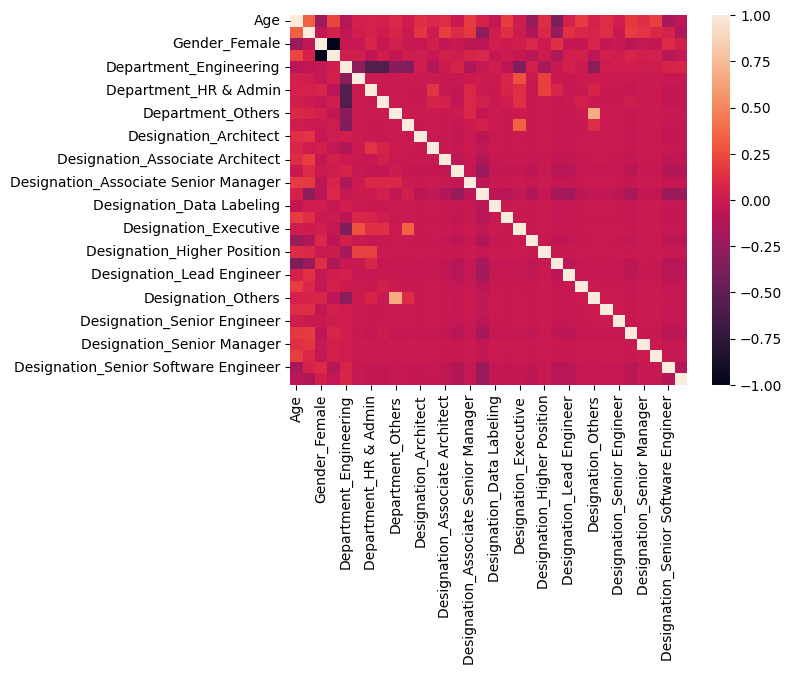

In [ ]:
import seaborn as sns
sns.heatmap(X_encoded.corr())

GradientBoostingClassifier

In [ ]:
# Create an instance of GradientBoostingClassifier
model = GradientBoostingClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7940298507462686


In [ ]:
import xgboost as xgb

Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
# Create an instance of LogisticRegression
model = LogisticRegression()

# Train the logistic regression model
model.fit(X_train, y_train)

# Make predictions on the test set using logistic regression
y_pred = model.predict(X_test)

# Calculate accuracy for logistic regression
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy (Logistic Regression):', accuracy)

Accuracy (Logistic Regression): 0.6865671641791045


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


XGBClassifier

For the above dataset this M.L Model has the highest accuracy

In [ ]:
# Create an instance of XGBClassifier
model5 = xgb.XGBClassifier()

# Train the model
model5.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model5.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8


Save the model for further use

In [ ]:
import joblib
# Save the trained model to a file
joblib.dump(model5, 'xgb_model.pkl')

['xgb_model.pkl']

In [ ]:
# Load the saved Random Forest Classifier from 'rf_model.pkl'
model5 = joblib.load('xgb_model.pkl')

In [ ]:
data.head()
data.tail()

,EMPCODE,Age,Gender,Department,Designation,Workperiod in Months,Retention
1667,R995,28.096488,Male,Engineering,Consultant,2.400000,NO
1668,R996,31.192334,Male,Engineering,Consultant,6.033333,NO
1669,R997,37.850042,Male,Engineering,Consultant,22.566667,YES
1670,R998,27.863765,Female,Engineering,Consultant,9.933333,NO
1671,Test123,30.153948,Female,Others,Others,43.266667,YES


In [ ]:
print(y)

[0 0 0 ... 1 0 1]


In [ ]:
data['Designation'].value_counts().sort_index()

Architect                     23
Assistant Manager              8
Associate Architect           47
Associate Engineer           181
Associate Senior Manager      17
Consultant                   540
Data Labeling                 17
Deputy Manager                26
Executive                      9
Graduate Engineer Trainee     55
Higher Position                4
Intern                       102
Lead Engineer                124
Manager                       20
Others                         8
Senior Architect               9
Senior Engineer               18
Senior Lead Engineer         105
Senior Manager                 6
Senior Principal Engineer      7
Senior Software Engineer     171
Software Engineer            175
Name: Designation, dtype: int64

In [ ]:
# Designation
dict = {
    "1":"Architect",
    "2":"Assistant Manager",
    "3":"Associate Architect",
    "4":"Associate Engineer",
    "5":"Associate Senior Manager",
    "6":"Consultant",
    "7":"Data Labeling",
    "8":"Deputy Manager",
    "9":"Executive",
    "10":"Graduate Engineer Trainee",
    "11":"Intern",
    "12":"Lead Engineer",
    "13":"Manager",
    "14":"Senior Architect",
    "15":"Senior Engineer",
    "16":"Senior Lead Engineer",
    "17":"Senior Manager",
    "18":"Senior Principal Engineer",
    "19":"Senior Software Engineer",
    "20":"Software Engineer",
    "21":"Higher Position",
    "22":"Others",
}

# department
dict1 = {
    "1": "Engineering",
    "2": "HR & Admin",
    "3": "IT",
    "4": "Purchase",
    "5": "Others",
    "6": "Finance",
}

# Gender
dict2 = {
    "1" : "Male",
    "2" : "Female"
}




Getting the user Input

In [ ]:
# Age
getvalue3 = int(input("Enter the Age of the persons in years:"))
print("Age:",getvalue3)

print("\n")

# Gender
print("Choose between these options:")
for key, value in dict2.items():
    print(key, "-", value)

x2 = str(input("User Input:"))

getvalue2 = dict2.get(x2)
print("Gender:",getvalue2)

print("\n")

# Department
print("Choose between these options:")
for key, value in dict1.items():
    print(key, "-", value)

x1 = str(input("User Input:"))
getvalue1 = dict1.get(x1)
print("Department:",getvalue1)

print("\n")

# Designation
print("Choose between these options:")
for key, value in dict.items():
    print(key, "-", value)

x = str(input("User Input:"))
getvalue = dict.get(x)
print("Designation:",getvalue)

print("\n")

# Work Period in Months
getvalue4 = int(input("Enter the Workperiod in Months:"))
print("Workperiod in Months:",getvalue4)

Enter the Age of the persons in years:26
Age: 26


Choose between these options:
1 - Male
2 - Female
User Input:1
Gender: Male


Choose between these options:
1 - Engineering
2 - HR & Admin
3 - IT
4 - Purchase
5 - Others
6 - Finance
User Input:1
Department: Engineering


Choose between these options:
1 - Architect
2 - Assistant Manager
3 - Associate Architect
4 - Associate Engineer
5 - Associate Senior Manager
6 - Consultant
7 - Data Labeling
8 - Deputy Manager
9 - Executive
10 - Graduate Engineer Trainee
11 - Intern
12 - Lead Engineer
13 - Manager
14 - Senior Architect
15 - Senior Engineer
16 - Senior Lead Engineer
17 - Senior Manager
18 - Senior Principal Engineer
19 - Senior Software Engineer
20 - Software Engineer
21 - Higher Position
22 - Others
User Input:19
Designation: Senior Software Engineer


Enter the Workperiod in Months:18
Workperiod in Months: 18


Deploying the Model

In [ ]:
# Create a DataFrame from user input
#input_data = pd.DataFrame({'Age': [34],'Gender': ['Male'],'Department': ['Engineering'],
#'Designation': ['Associate Architect'],'Workperiod in Months': [114]})

# Using the user input
input_data = pd.DataFrame({'Age': [getvalue3],
                           'Gender': [getvalue2],
                           'Department': [getvalue1],
                           'Designation': [getvalue],
                           'Workperiod in Months': [getvalue4]})

# Encoding categorical features using one-hot encoding
input_data_encoded = pd.get_dummies(input_data)
input_data_encoded = input_data_encoded.reindex(columns=X_train.columns, fill_value=0)


# Make the prediction using the trained model
retention_prediction = model5.predict(input_data_encoded)
print(retention_prediction)

# Display the predicted retention status
if retention_prediction == [1]:
    print("The employee is predicted to stay.")
else:
    print("The employee is predicted to leave.")

[1]
The employee is predicted to stay.
